# Descriptive Statistics

Creating a Panda dataframe from SQL database and importing visualization library, Seaborn

In [9]:
import sqlite3
import pandas as pd
import seaborn as sns

# Specify the path to the .db file
db_path = "C:\\Users\\agomu\\Python\\github\\poke_api\\pokemon.db"

# Establish a connection to the SQLite database
conn = sqlite3.connect(db_path)

# Write your SQL query to select data from the desired table(s)
query = "SELECT * FROM pokemon_tbl"

# Use pandas.read_sql() to execute the query and retrieve the data as a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()


Inspect the dataframe to make sure it is reading from the table correctly

In [10]:
# View the first 5 rows of the DataFrame
df.head()

,name,id,height,base_experience,pokemon_species_id,weight,hp,attack,defense,special-attack,...,is_legendary,is_mythical,capture_rate,base_happiness,hatch_counter,growth_rate,generation_name,habitat_name,type_name_1,type_name_2
0,bulbasaur,1,7,64,1,69,45,49,49,65,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
1,ivysaur,2,10,142,2,130,60,62,63,80,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
2,venusaur,3,20,263,3,1000,80,82,83,100,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
3,charmander,4,6,62,4,85,39,52,43,60,...,False,False,45,50,20,medium-slow,generation-i,mountain,fire,
4,charmeleon,5,11,142,5,190,58,64,58,80,...,False,False,45,50,20,medium-slow,generation-i,mountain,fire,


Generate summary statistics of all numerical columns

In [11]:
print(df.describe())

                 id       height  pokemon_species_id        weight  \
count   1279.000000  1279.000000         1279.000000   1279.000000   
mean    2545.263487    20.560594          498.024238    977.837373   
std     3946.023359    54.637581          300.223688   1979.579636   
min        1.000000     1.000000            1.000000      0.000000   
25%      320.500000     5.000000          229.000000     88.500000   
50%      640.000000    10.000000          501.000000    315.000000   
75%      959.500000    16.000000          764.500000    810.500000   
max    10271.000000  1000.000000         1008.000000  10000.000000   

                hp       attack      defense  special-attack  special-defense  \
count  1279.000000  1279.000000  1279.000000     1279.000000      1279.000000   
mean     70.942924    81.405786    74.842846       73.317435        72.655981   
std      26.811503    31.824740    30.470327       32.437385        27.434438   
min       1.000000     5.000000     5.000000 

Create visualization using Seaborn to check distribution of HP stat

[Text(0.5, 1.0, 'Distribution of HP Stat')]

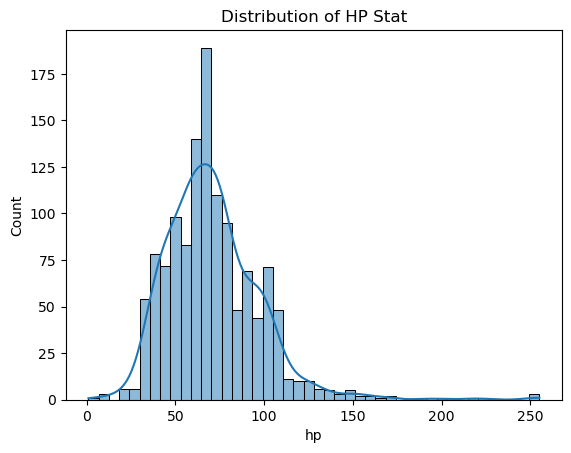

In [18]:
# Plot the distribution of the HP column using Seaborn
hp_plt = sns.histplot(df['hp'], kde=True)  # Enable kernel density estimation (KDE) for smoother curve, or use bins=# if you want to create the bins yourself

# Modify the plot lables
hp_plt.set(title='Distribution of HP Stat')

Feel free to create visualizations of any other key stats